# <a id='toc1_'></a>[Assignment2 - Supervised Learning flow](#toc0_)

## <a id='toc1_1_'></a>[Part 1 - Student details](#toc0_)
* Please write the First Name and last 4 digits of the i.d. for each student. For example:
<pre>Israel 9812</pre>

**Table of contents**<a id='toc0_'></a>    
- [Assignment2 - Supervised Learning flow](#toc1_)    
  - [Part 1 - Student details](#toc1_1_)    
  - [Part 2 - Experiments](#toc1_2_)    
    - [Load the datasets](#toc1_2_1_)    
    - [EDA](#toc1_2_2_)    
      - [Correlation Heatmap](#toc1_2_2_1_)    
      - [Pclass](#toc1_2_2_2_)    
        - [Counts](#toc1_2_2_2_1_)    
        - [Relation To The Survival Rate](#toc1_2_2_2_2_)    
      - [Sex](#toc1_2_2_3_)    
        - [Counts](#toc1_2_2_3_1_)    
        - [Relation To The Survival Rate](#toc1_2_2_3_2_)    
      - [Basic statistics and Information About The Datasets](#toc1_2_2_4_)    
    - [Feature Engineering](#toc1_2_3_)    
      - [Data binning](#toc1_2_3_1_)    
      - [Pearson correlation coefficient](#toc1_2_3_2_)    
    - [Training](#toc1_2_4_)    
      - [Logistic regression](#toc1_2_4_1_)    
      - [Random forest](#toc1_2_4_2_)    
    - [Grid Search](#toc1_2_5_)    
  - [Part 3 - Training flow](#toc1_3_)    
  - [Part 4 - Apply on test and show model performance estimation](#toc1_4_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [150]:
# Liav Mordouch 3327
# Omer Kafe 0647
# Roi Cohen 2154
# student 4:
# (optional) student 5:
# (optional) student 6:

## <a id='toc1_2_'></a>[Part 2 - Experiments](#toc0_)

In [151]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import KBinsDiscretizer, StandardScaler
from sklearn.decomposition import PCA

### <a id='toc1_2_1_'></a>[Load the datasets](#toc0_)

In [152]:
train_data = pd.read_csv("titanic_train.csv")
test_data = pd.read_csv("titanic_test.csv")

# Display the first 5 rows of each dataset
# The default value of head() is 5 so we don't need to specify it

print("Train Data:")
print(train_data.head())

print("\nTest Data:")
print(test_data.head())

Train Data:
   Pclass  Sex   Age  SibSp  Parch     Fare  Embarked  Survived
0       1    0  54.0      1      0  78.2667         1         1
1       2    0  45.0      0      0  13.5000         0         1
2       3    1  20.0      0      0   9.5000         0         0
3       3    1  36.0      0      0   7.8958         0         0
4       3    1  22.0      0      0   8.0500         0         0

Test Data:
   Pclass  Sex        Age  SibSp  Parch     Fare  Embarked  Survived
0       3    1  35.000000      0      0   7.0500         0         0
1       3    1  30.000000      0      0   7.2500         0         0
2       3    1  29.699118      0      0  14.5000         0         0
3       3    0  21.000000      0      0   7.7500         2         0
4       3    1  32.000000      0      0  56.4958         0         1


### <a id='toc1_2_2_'></a>[EDA](#toc0_)

#### <a id='toc1_2_2_1_'></a>[Correlation Heatmap](#toc0_)
Using a correlation heatmap, we can see a correlation between two variables in the dataset. It's interesting to see that most variables do not have any correlation, except for the `SibSp` and the `Parch`, and the `fare` and the `survived` variables (which is definitely more interesting)

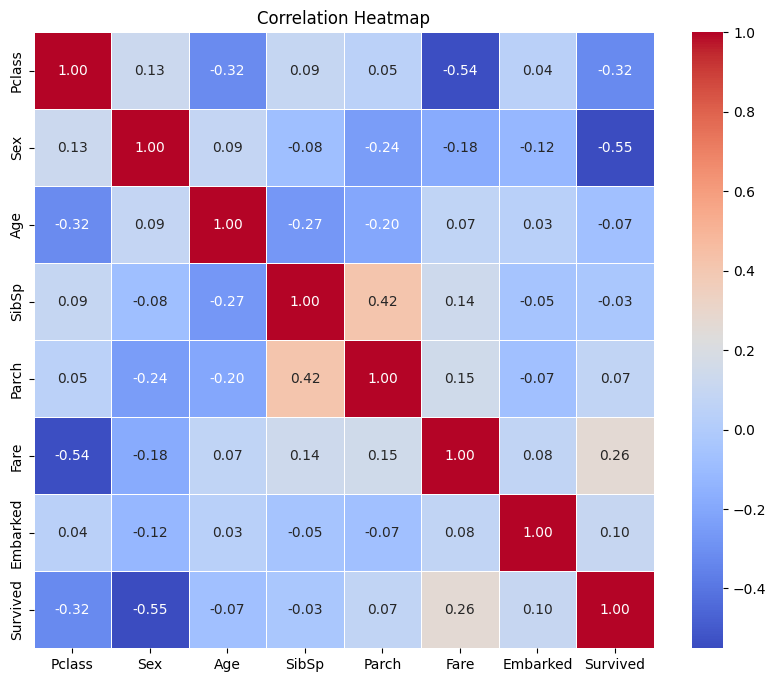

In [153]:
corr_matrix = train_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

#### <a id='toc1_2_2_2_'></a>[Pclass](#toc0_)

##### <a id='toc1_2_2_2_1_'></a>[Counts](#toc0_)

In [154]:
pclass_counts = train_data.Pclass.value_counts()
print(pclass_counts)

Pclass
3    388
1    178
2    146
Name: count, dtype: int64


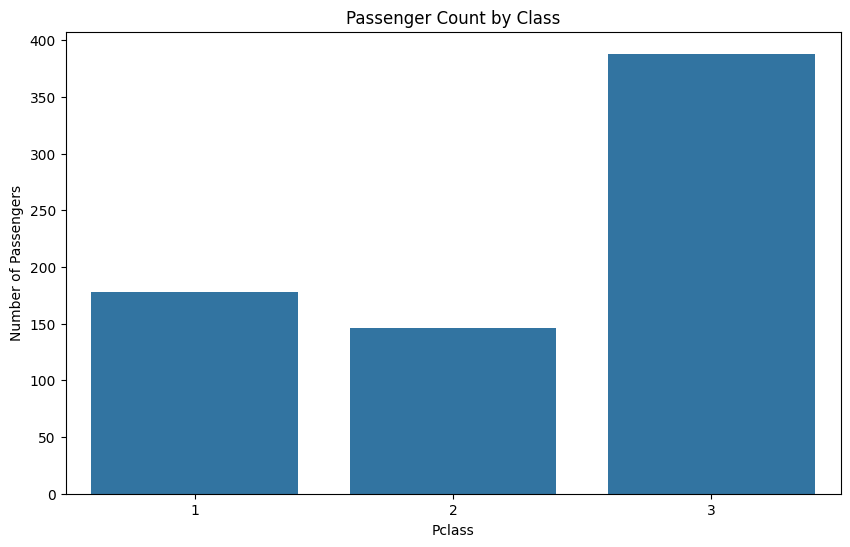

In [155]:
plt.figure(figsize=(10, 6))
sns.countplot(x="Pclass", data=train_data)
plt.title("Passenger Count by Class")
plt.xlabel("Pclass")
plt.ylabel("Number of Passengers")
plt.show()

##### <a id='toc1_2_2_2_2_'></a>[Relation To The Survival Rate](#toc0_)

In [156]:
survival_rates_Pclass = train_data.groupby("Pclass")["Survived"].mean()
df = pd.DataFrame(survival_rates_Pclass)
df.columns = ["Survival Rate"]
df["Survival Rate"] = (df["Survival Rate"] * 100).map("{:.2f}%".format)
print(df)

       Survival Rate
Pclass              
1             63.48%
2             45.89%
3             26.03%


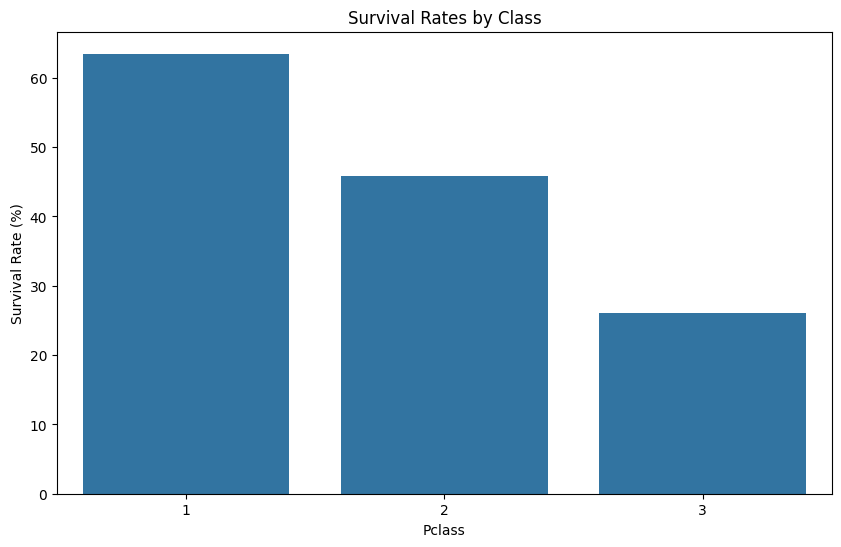

In [157]:
plt.figure(figsize=(10, 6))
sns.barplot(x=survival_rates_Pclass.index, y=survival_rates_Pclass.values * 100)
plt.title("Survival Rates by Class")
plt.xlabel("Pclass")
plt.ylabel("Survival Rate (%)")
plt.show()

#### <a id='toc1_2_2_3_'></a>[Sex](#toc0_)

##### <a id='toc1_2_2_3_1_'></a>[Counts](#toc0_)

In [158]:
Sex_counts = train_data.Sex.value_counts()
print(Sex_counts)

Sex
1    456
0    256
Name: count, dtype: int64


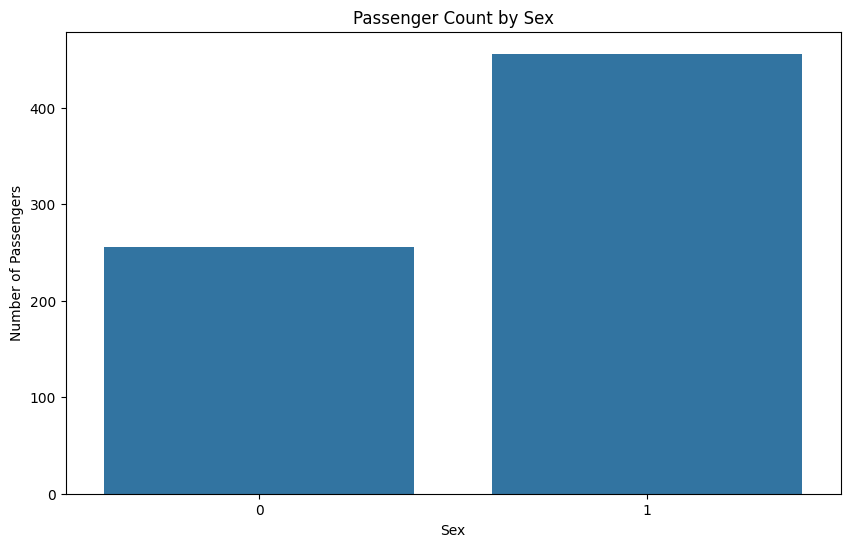

In [159]:
plt.figure(figsize=(10, 6))
sns.countplot(x="Sex", data=train_data)
plt.title("Passenger Count by Sex")
plt.xlabel("Sex")
plt.ylabel("Number of Passengers")
plt.show()

##### <a id='toc1_2_2_3_2_'></a>[Relation To The Survival Rate](#toc0_)

In [160]:
survival_rates_Sex = train_data.groupby("Sex")["Survived"].mean()
df = pd.DataFrame(survival_rates_Sex)
df.columns = ["Survival Rate"]
df["Survival Rate"] = (df["Survival Rate"] * 100).map("{:.2f}%".format)
print(df)

    Survival Rate
Sex              
0          75.39%
1          19.30%


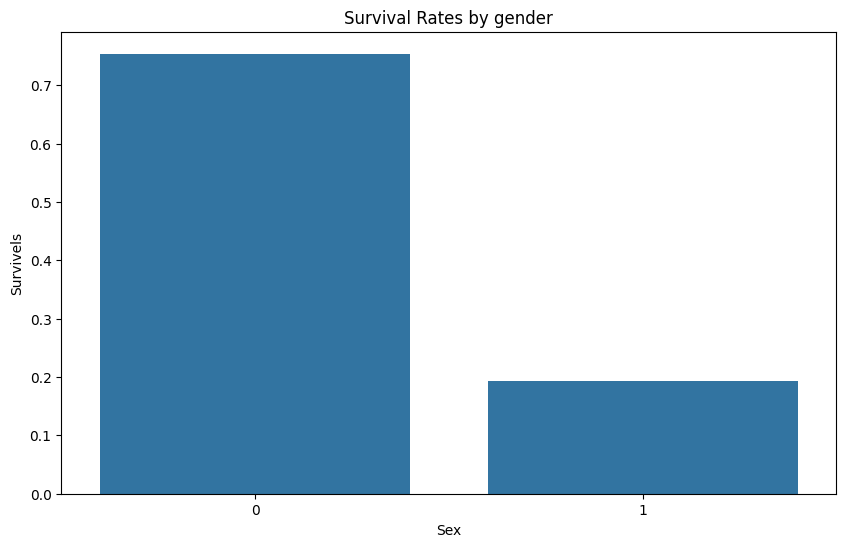

In [161]:
plt.figure(figsize=(10, 6))
sns.barplot(x=survival_rates_Sex.index, y=survival_rates_Sex.values)
plt.title("Survival Rates by gender")
plt.xlabel("Sex")
plt.ylabel("Survivels")
plt.show()

#### <a id='toc1_2_2_4_'></a>[Basic statistics and Information About The Datasets](#toc0_)

In [162]:
print("Train Data Statistics:")
print(train_data.describe())

print("\nTest Data Statistics:")
print(test_data.describe())

Train Data Statistics:
           Pclass         Sex         Age       SibSp       Parch        Fare  \
count  712.000000  712.000000  712.000000  712.000000  712.000000  712.000000   
mean     2.294944    0.640449   29.531213    0.528090    0.384831   32.379429   
std      0.841990    0.480206   13.188028    1.055052    0.803085   49.836074   
min      1.000000    0.000000    0.670000    0.000000    0.000000    0.000000   
25%      1.750000    0.000000   22.000000    0.000000    0.000000    7.925000   
50%      3.000000    1.000000   29.699118    0.000000    0.000000   14.500000   
75%      3.000000    1.000000   35.000000    1.000000    0.000000   31.275000   
max      3.000000    1.000000   80.000000    8.000000    6.000000  512.329200   

         Embarked    Survived  
count  712.000000  712.000000  
mean     0.372191    0.394663  
std      0.649970    0.489122  
min      0.000000    0.000000  
25%      0.000000    0.000000  
50%      0.000000    0.000000  
75%      1.000000    1.

In [163]:
# information of the columns
train_data.info()
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    712 non-null    int64  
 1   Sex       712 non-null    int64  
 2   Age       712 non-null    float64
 3   SibSp     712 non-null    int64  
 4   Parch     712 non-null    int64  
 5   Fare      712 non-null    float64
 6   Embarked  712 non-null    int64  
 7   Survived  712 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 44.6 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    179 non-null    int64  
 1   Sex       179 non-null    int64  
 2   Age       179 non-null    float64
 3   SibSp     179 non-null    int64  
 4   Parch     179 non-null    int64  
 5   Fare      179 non-null    float64
 6   Embarked  179 non-null    int64  


- we can see that there are not missing values. 
712 non-nulls in each of the columns on the train data.
179 non-nulls in each of the columns on the test data. 

### <a id='toc1_2_3_'></a>[Feature Engineering](#toc0_)

*Note*: As far as we understood the project, this whole feature engineering section is mainly saved for testing how the features change the data, and the optimal parameters that we apply should be applied in the grid search part.

We did it because the feature-enginnering part used terms like "expirement" while the training part explicitly told us to find the best parameters.

#### <a id='toc1_2_3_1_'></a>[Data binning](#toc0_)

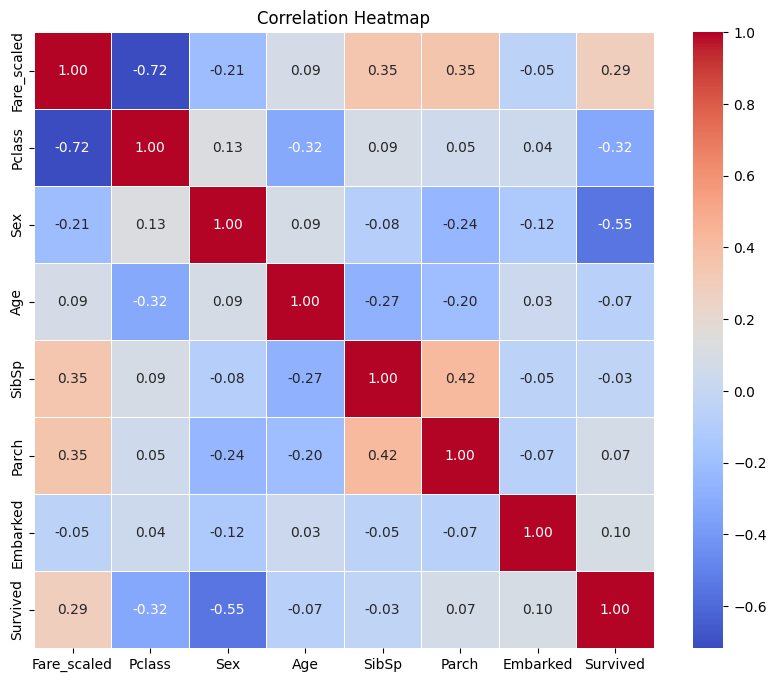

Transformed Train Data:
   Fare_scaled  Pclass  Sex   Age  SibSp  Parch  Embarked  Survived
0          2.0     1.0  0.0  54.0    1.0    0.0       1.0       1.0
1          1.0     2.0  0.0  45.0    0.0    0.0       0.0       1.0
2          1.0     3.0  1.0  20.0    0.0    0.0       0.0       0.0
3          0.0     3.0  1.0  36.0    0.0    0.0       0.0       0.0
4          0.0     3.0  1.0  22.0    0.0    0.0       0.0       0.0

Transformed Test Data:
   Fare_scaled  Pclass  Sex        Age  SibSp  Parch  Embarked  Survived
0          0.0     3.0  1.0  35.000000    0.0    0.0       0.0       0.0
1          0.0     3.0  1.0  30.000000    0.0    0.0       0.0       0.0
2          1.0     3.0  1.0  29.699118    0.0    0.0       0.0       0.0
3          0.0     3.0  0.0  21.000000    0.0    0.0       2.0       0.0
4          2.0     3.0  1.0  32.000000    0.0    0.0       0.0       1.0


In [164]:
fare_transformer = Pipeline(
    steps=[
        ("binning", KBinsDiscretizer(n_bins=3, encode="ordinal", strategy="quantile")),
    ]
)

preprocessor = ColumnTransformer(
    transformers=[("fare", fare_transformer, ["Fare"])], remainder="passthrough"
)

train_data_copy = train_data.copy()
test_data_copy = test_data.copy()

train_data_transformed = preprocessor.fit_transform(train_data_copy)
test_data_transformed = preprocessor.transform(test_data_copy)

feature_names = np.concatenate(
    [["Fare_scaled"], train_data_copy.columns[(train_data_copy.columns != "Fare")]]
)

train_data_transformed_df = pd.DataFrame(train_data_transformed, columns=feature_names)
test_data_transformed_df = pd.DataFrame(test_data_transformed, columns=feature_names)

corr_matrix = train_data_transformed_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

print("Transformed Train Data:")
print(train_data_transformed_df.head())

print("\nTransformed Test Data:")
print(test_data_transformed_df.head())

#### <a id='toc1_2_3_2_'></a>[Pearson correlation coefficient](#toc0_)

In [165]:
corr_matrix = train_data.corr()
selected_features = corr_matrix["Survived"][abs(corr_matrix["Survived"]) > 0.08].index
selected_features = selected_features[selected_features != "Survived"]

print("Selected features:", selected_features)

Selected features: Index(['Pclass', 'Sex', 'Fare', 'Embarked'], dtype='object')


In [166]:
scaler = StandardScaler()
train_data[selected_features] = scaler.fit_transform(train_data[selected_features])
test_data[selected_features] = scaler.transform(test_data[selected_features])

print(train_data.head())

     Pclass       Sex   Age  SibSp  Parch      Fare  Embarked  Survived
0 -1.539037 -1.334635  54.0      1      0  0.921411  0.966584         1
1 -0.350540 -1.334635  45.0      0      0 -0.379097 -0.573031         1
2  0.837957  0.749269  20.0      0      0 -0.459416 -0.573031         0
3  0.837957  0.749269  36.0      0      0 -0.491629 -0.573031         0
4  0.837957  0.749269  22.0      0      0 -0.488532 -0.573031         0


### <a id='toc1_2_4_'></a>[Training](#toc0_)

In [167]:
X_train = train_data[selected_features]
y_train = train_data["Survived"]
X_val = test_data[selected_features]
y_val = test_data["Survived"]

#### <a id='toc1_2_4_1_'></a>[Logistic regression](#toc0_)

In [168]:
log_reg = LogisticRegression(C=0.5, solver="liblinear")
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_val)
accuracy_log_reg = accuracy_score(y_val, y_pred_log_reg)
f1 = f1_score(y_val, y_pred_log_reg)
print(f"Logistic Regression Accuracy: {accuracy_log_reg}")
print(f"Logistic Regression F1 Score: {f1}")

Logistic Regression Accuracy: 0.7597765363128491
Logistic Regression F1 Score: 0.6504065040650406


#### <a id='toc1_2_4_2_'></a>[Random forest](#toc0_)

In [169]:
random_forest = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_val)
accuracy_rf = accuracy_score(y_val, y_pred_rf)
f1 = f1_score(y_val, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf}")
print(f"Random Forest F1 Score: {f1}")

Random Forest Accuracy: 0.8379888268156425
Random Forest F1 Score: 0.7289719626168224


### <a id='toc1_2_5_'></a>[Grid Search](#toc0_)

In [170]:
preprocessor = ColumnTransformer(
    transformers=[
        (
            "fare_binning",
            KBinsDiscretizer(encode="ordinal", strategy="quantile"),
            ["Fare"],
        )
    ],
    remainder="passthrough",
)

pipeline = Pipeline(
    [
        ("preprocessor", preprocessor),
        ("feature_selection", SelectKBest(f_classif)),
        ("scaler", StandardScaler()),
        ("classifier", LogisticRegression()),
    ]
)

param_grid = [
    {
        "preprocessor__fare_binning__n_bins": [2, 5, 7, 9, 11],
        "feature_selection__k": [1, 2, 3, "all"],
        "classifier": [LogisticRegression()],
        "classifier__C": [0.01, 0.1, 1, 10, 100],
        "classifier__solver": ["liblinear"],
    },
    {
        "preprocessor__fare_binning__n_bins": [2, 5, 7, 9, 11],
        "feature_selection__k": [1, 2, 3, "all"],
        "classifier": [RandomForestClassifier()],
        "classifier__n_estimators": [50, 100, 200],
        "classifier__max_depth": [3, 5, 7, None],
        "classifier__min_samples_split": [2, 4, 6],
        "classifier__min_samples_leaf": [1, 2, 4],
        "classifier__bootstrap": [True, False],
    },
]

cv = StratifiedKFold(n_splits=5, shuffle=True)
grid_search = GridSearchCV(pipeline, param_grid, cv=cv, scoring="f1", verbose=0, n_jobs=-1)

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best F1 score:", grid_search.best_score_)

Best parameters: {'classifier': RandomForestClassifier(), 'classifier__bootstrap': True, 'classifier__max_depth': None, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 6, 'classifier__n_estimators': 200, 'feature_selection__k': 'all', 'preprocessor__fare_binning__n_bins': 11}
Best F1 score: 0.751449186640506


In [171]:
results_df = pd.DataFrame(grid_search.cv_results_)

results_df["classifier_type"] = results_df["param_classifier"].apply(
    lambda x: type(x).__name__
)

best_indices = results_df.groupby("classifier_type")["rank_test_score"].idxmin()
best_results_df = results_df.loc[best_indices]

summary_columns = {
    "classifier_type": "Classifier",
    "mean_test_score": "Mean F1 Score",
    "param_classifier__C": "C (LogReg)",
    "param_classifier__solver": "Solver (LogReg)",
    "param_classifier__n_estimators": "N Estimators (RF)",
    "param_classifier__max_depth": "Max Depth (RF)",
    "param_classifier__min_samples_split": "Min Samples Split (RF)",
    "param_classifier__min_samples_leaf": "Min Samples Leaf (RF)",
    "param_classifier__bootstrap": "Bootstrap (RF)",
}
summary_df = best_results_df[list(summary_columns.keys())].rename(
    columns=summary_columns
)

print(summary_df)

                  Classifier  Mean F1 Score  C (LogReg) Solver (LogReg)  \
0         LogisticRegression       0.717696        0.01       liblinear   
2079  RandomForestClassifier       0.751449         NaN             NaN   

      N Estimators (RF)  Max Depth (RF)  Min Samples Split (RF)  \
0                   NaN             NaN                     NaN   
2079              200.0             NaN                     6.0   

      Min Samples Leaf (RF) Bootstrap (RF)  
0                       NaN            NaN  
2079                    2.0           True  


## <a id='toc1_3_'></a>[Part 3 - Training flow](#toc0_)
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 2)

In [172]:
best_params = grid_search.best_params_

In [173]:
fare_binning_n_bins = best_params["preprocessor__fare_binning__n_bins"]
preprocessor = ColumnTransformer(
    transformers=[
        (
            "fare_binning",
            KBinsDiscretizer(
                n_bins=fare_binning_n_bins, encode="ordinal", strategy="quantile"
            ),
            ["Fare"],
        )
    ],
    remainder="passthrough",
    force_int_remainder_cols=False,
)

feature_selection_k = best_params["feature_selection__k"]
feature_selection = SelectKBest(f_classif, k=feature_selection_k)

classifier = RandomForestClassifier(
    n_estimators=best_params["classifier__n_estimators"],
    max_depth=best_params["classifier__max_depth"],
    min_samples_split=best_params["classifier__min_samples_split"],
    min_samples_leaf=best_params["classifier__min_samples_leaf"],
    bootstrap=best_params["classifier__bootstrap"],
)

final_model = Pipeline(
    [
        ("preprocessor", preprocessor),
        ("feature_selection", feature_selection),
        ("scaler", StandardScaler()),
        ("classifier", classifier),
    ]
)


final_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   remainder='passthrough',
                                   transformers=[('fare_binning',
                                                  KBinsDiscretizer(encode='ordinal',
                                                                   n_bins=11),
                                                  ['Fare'])])),
                ('feature_selection', SelectKBest(k='all')),
                ('scaler', StandardScaler()),
                ('classifier',
                 RandomForestClassifier(min_samples_leaf=2, min_samples_split=6,
                                        n_estimators=200))])

## <a id='toc1_4_'></a>[Part 4 - Apply on test and show model performance estimation](#toc0_)

In [174]:
y_pred = final_model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
print(f"Final Model Accuracy: {accuracy}")
print(f"Final Model F1 Score: {f1}")

Final Model Accuracy: 0.8379888268156425
Final Model F1 Score: 0.7289719626168224
